## Identify Indicators related to heavy traffic on the I-94 Interstate Highway 🛣 🚘

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  
%matplotlib inline

In [27]:
traffic_dataset = pd.read_csv('../dataset/Metro_Interstate_Traffic_Volume.csv')

In [36]:
traffic_dataset.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [45]:
traffic_dataset.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [54]:
traffic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

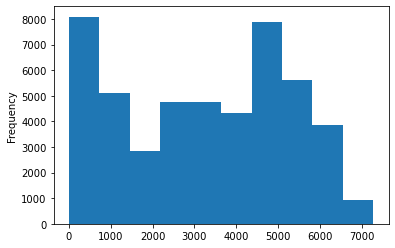

In [63]:
traffic_dataset.loc[:,"traffic_volume"].plot(kind="hist")
traffic_dataset["traffic_volume"].describe()

### Notice that the traffic usualy is between 0 and 7280 cars passsing on the station per hour. Having it's mean around 3260, furthermore, we can also derive from the graph that the traffic in the region is low (0, 1000) a lot of times. Now we can investigate more what makes the traffic so high in volume on some of the entries, we'll start by separating nighttime from daytime data 🕵🏻‍♂️

In [72]:
traffic_dataset["date_time"] = pd.to_datetime(traffic_dataset["date_time"])

daytime_dataset = traffic_dataset.loc[(traffic_dataset["date_time"].dt.hour >= 7) & (traffic_dataset["date_time"].dt.hour < 19),:]
nighttime_dataset = traffic_dataset.loc[(traffic_dataset["date_time"].dt.hour >= 19) | (traffic_dataset["date_time"].dt.hour < 7),:] 

In [79]:
def generate_traffic_graph_from_time_slice(dataset: pd.DataFrame, type: str, position: int):
    dataset.loc[:,"traffic_volume"].plot(title=f'{type} traffic volume', ax=axes[0, position], kind='hist', fontsize=12, xlim=[0, 7500], ylim=[0, 8000])
    axes[0, position].set_xlabel("Traffic Volume")
    axes[0, position].set_ylabel("Vehicles passing station per hour")


### Now that we've separated the traffic values from nighttime (7pm till' 7am) to daytime (7am till' 7pm), we can check the traffic volume related to each time, and try to see some correlation between the hour and traffic volume 🚏

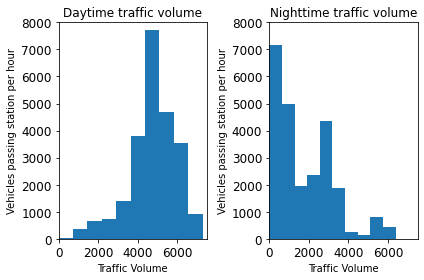

In [86]:
fig, axes = plt.subplots(nrows=1, ncols=2, squeeze=False)
generate_traffic_graph_from_time_slice(daytime_dataset, "Daytime", 0)
generate_traffic_graph_from_time_slice(nighttime_dataset, "Nighttime", 1)
fig.tight_layout()
plt.show()

In [93]:
daytime_dataset["traffic_volume"].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [100]:
nighttime_dataset["traffic_volume"].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

### As we could see in the Histograms and the description of the traffic volume column behaviour on both the daytime and the nighttime dataset, we can see that the volume on morning periods are substantially higher than its nighttime counterpart (notice the `mean` of each Series on the descirption). Hence further analysis will be made inside the daytime slice 🗡

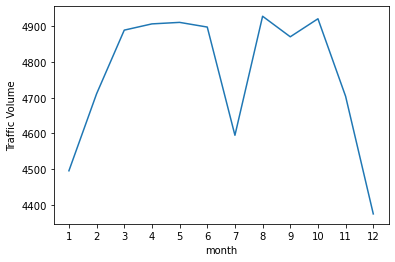

In [107]:
daytime_dataset.loc[:,"month"] = daytime_dataset.loc[:,"date_time"].dt.month
aggregation_by_month = daytime_dataset.groupby("month").mean()
ax = aggregation_by_month.loc[:,"traffic_volume"].plot()
_ylabel = ax.set_ylabel("Traffic Volume")
_xticks = ax.set_xticks(range(1, 13))

### We can see that there's spike between March and June, as well as on August until October. These are colder months, than from November to febuary, when the traffic is way lighter. The lower traffic on July is probably due to vacation period 🏖

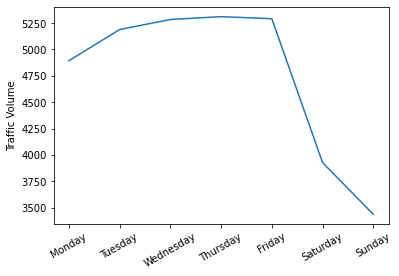

In [114]:
daytime_dataset.loc[:,"dayofweek"] = daytime_dataset.loc[:,"date_time"].dt.dayofweek
aggregation_by_weekday = daytime_dataset.groupby("dayofweek").mean()
ax = aggregation_by_weekday.loc[:,"traffic_volume"].plot()
_ylabel = ax.set_ylabel("Traffic Volume")
_xlabel = ax.set_xlabel("")
_xticks = ax.set_xticks(range(0, 7))
_xticklabels = ax.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], rotation=30)

### As we can see, there's also a clear difference on traffic volume on the weekend ☀️
### It's substantially smaller than on weekdays

In [ ]:
def generate_traffic_graph_from_hour_slice(dataset: pd.DataFrame, type: str, position: int, hours: list):
    dataset.loc[:,"traffic_volume"].plot(title=f'{type} traffic volume', ax=axes[0, position], kind='line', fontsize=12)
    axes[0, position].set_xticks(hours)
    axes[0, position].set_xticklabels(hours)
    axes[0, position].set_xlabel("Hour of the day")
    axes[0, position].set_ylabel("Traffic Volume")

In [ ]:
daytime_dataset.loc[:,"hour"] = daytime_dataset.loc[:,"date_time"].dt.hour
weekdays = daytime_dataset.copy().loc[daytime_dataset["dayofweek"] <= 4,:]
weekends = daytime_dataset.copy().loc[daytime_dataset["dayofweek"] > 4, :]
aggregation_by_weekdays = weekdays.groupby("hour").mean()
aggregation_by_weekends = weekends.groupby("hour").mean()
fig, axes = plt.subplots(nrows=1, ncols=2, squeeze=False)
generate_traffic_graph_from_hour_slice(aggregation_by_weekdays, "Weekday", 0, weekdays["hour"].unique())
generate_traffic_graph_from_hour_slice(aggregation_by_weekends, "Weekend", 1, weekends["hour"].unique())
fig.tight_layout()
fig.set_figwidth(12)
plt.show()

### We can clearly see the rush hour effect on the weekday traffic volume (going between 15h and 17h), as well as a spike on the hour that people are probably leaving their homes to go to work. On the weekend the graph is much more homogeneous if not for the start of the morning ⾠
### Now we're going to check if there are any correlation with the weather 🌤

In [179]:
numerical_weather_columns = daytime_dataset.select_dtypes(include=np.number)
numerical_weather_columns = numerical_weather_columns.loc[:,['temp', 'rain_1h', 'snow_1h', 'clouds_all']].columns.tolist()
numerical_weather_columns

['temp', 'rain_1h', 'snow_1h', 'clouds_all']

### As we can see, those are the columns related to weather data that are stored as numerical values, hence making the analysis easier

In [184]:
def get_correlation(dataset: pd.DataFrame, weather_column: str):
    return abs(dataset.loc[:,["traffic_volume", weather_column]].corr(method='pearson').iloc[0, 1])

max_weather_correlation = {
    "value": 0,
    "column": ""
}
for idx, weather_column in enumerate(numerical_weather_columns):
    weather_correlation = get_correlation(daytime_dataset, weather_column)

    if weather_correlation > max_weather_correlation["value"]:
        max_weather_correlation["value"] = weather_correlation
        max_weather_correlation["column"] = weather_column

print(max_weather_correlation)

{'value': 0.12831656852303988, 'column': 'temp'}


### As we can see, the column that has the highest correlation with the traffic volume is temperature, we'll now plot a scatter plot graph in order to see how it behaves

<AxesSubplot:xlabel='traffic_volume', ylabel='temp'>

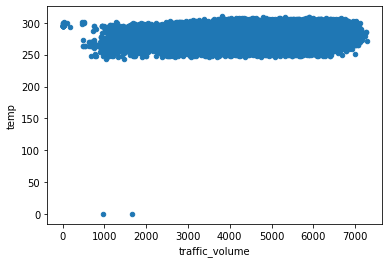

In [182]:
daytime_dataset.plot.scatter("traffic_volume", max_weather_correlation["column"])

### Even though, we've found more correlation with the temperature column, no relevat information could be found, also, there are some outliers in the dataset stating that the temperature is at 0K, which is obviously impossible

### There are 2 more columns in which more exploration can be done, `weather_main` and `weather_description` 🌊

In [189]:
aggregation_by_weather_main = daytime_dataset.groupby("weather_main").mean()
aggregation_by_weather_description = daytime_dataset.groupby("weather_description").mean()

In [218]:
def plot_categorical_weather_data_correlation(aggregation: pd.DataFrame, larger: bool):
    fig, axes = plt.subplots(nrows=1, ncols=1, squeeze=False)
    aggregation.loc[:,"traffic_volume"].plot(kind='barh', ax=axes[0, 0])
    axes[0,0].set_xlabel("Traffic Volume")
    fig.tight_layout()
    fig.set_figheight(16 if larger else 12)
    fig.set_figwidth(16 if larger else 12)
    plt.show()

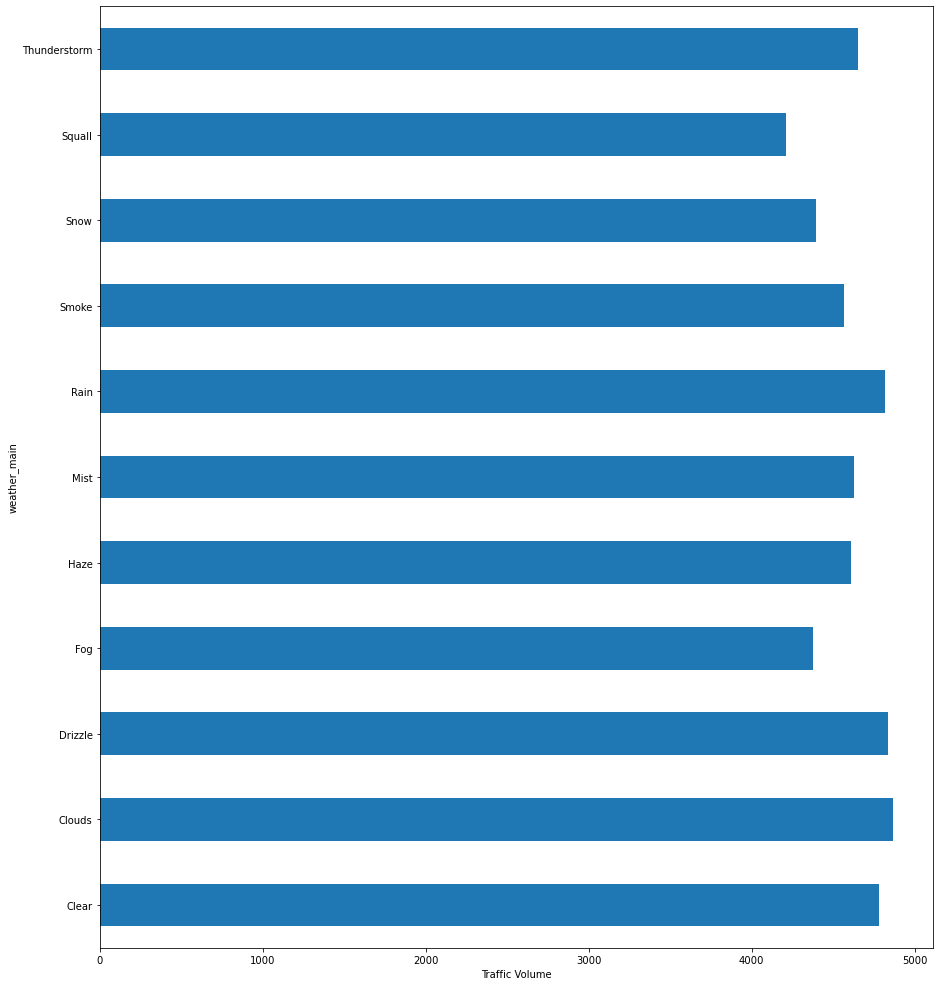

In [219]:
plot_categorical_weather_data_correlation(aggregation_by_weather_main, True)

### As we can see, by watching the main weather condition we cannot extract any valuable information regarding the increase of traffic volume

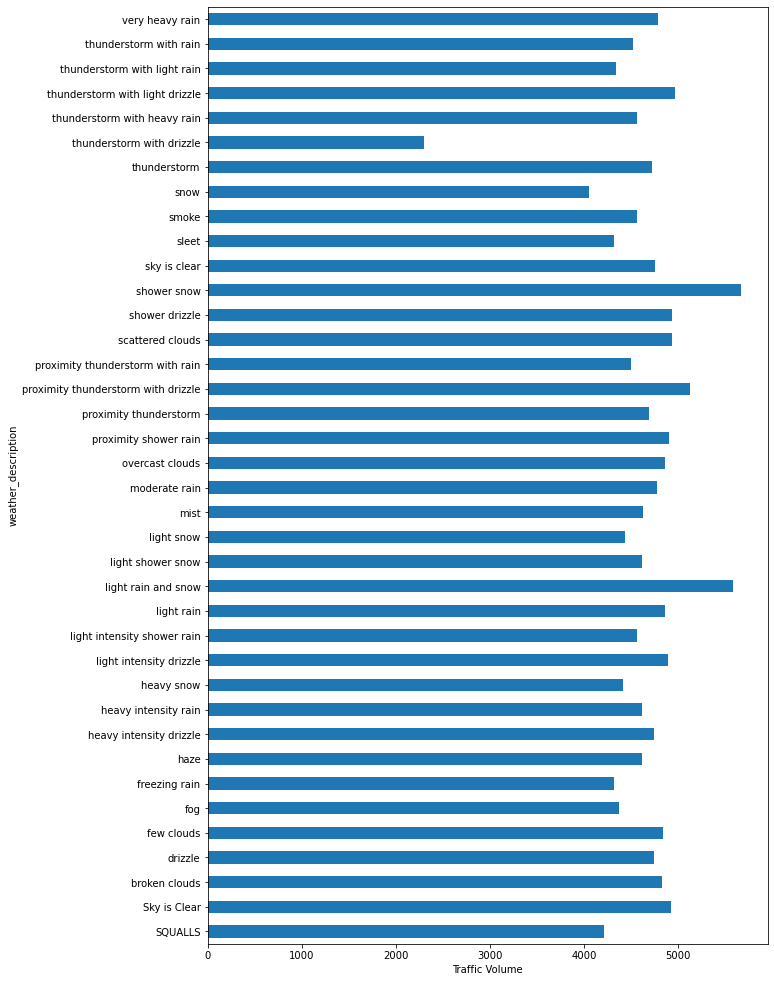

In [220]:
plot_categorical_weather_data_correlation(aggregation_by_weather_description, True)

### But, when we jump to more detailed information, we can see that `light rain and snow` and `shower snow` yield substantially higher traffic volume than on different weather conditions 🌧❄️
### It's also easy to see that when the climate is described as `thunderstorm with drizzle` the movement is extremely lower than on other situations, probably due to an increased risk of accidents 🛑
<br>

### To sum up, we've discovered that the higher traffic on the I-94 Interstate Highway is related to warmer months of the year, also being substantially higher on the morning. We've also checked the rush hour of the road, around 7am and 16pm with a much higher movement on business days and that it increased its volume on rainy and snowy climates ࿋